<a href="https://colab.research.google.com/github/nurdianarhm/Penambangan-Data-dan-Analisis-Bisnis/blob/main/Visualisasi%20Harga%20Emas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df_gold = pd.read_csv('/content/Daily.csv')
df_gold

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,12/29/1978,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/1979,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1979,226.8,137.3,"43,164.9",111.5,263.7,359.6,"1,792.9",NaN,NaN,735.6,"138,160.5",851.3,"4,454.6",NaN,NaN,"107,470.0",NaN,194.6,193.6
3,1/3/1979,218.6,134.0,"43,717.9",108.0,264.4,365.9,"1,802.2",NaN,NaN,739.4,"138,877.0",855.7,"4,477.7",NaN,NaN,"108,027.4",NaN,192.2,193.0
4,1/4/1979,223.2,136.8,"43,674.9",110.7,264.1,366.4,"1,811.7",NaN,NaN,743.4,"139,616.3",860.3,"4,501.5",NaN,NaN,"108,602.5",NaN,193.0,194.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,7/17/2023,"1,949.6","1,735.6","270,624.0","1,491.1","2,568.8","1,677.6","159,940.3","13,982.7","51,361.4","7,315.3","29,228,403.2","7,160.9","67,407.4","46,090,493.6","60,236.8","2,465,659.1","176,457.3","35,146.6","2,857.8"
11622,7/18/2023,"1,975.0","1,761.0","274,742.3","1,515.2","2,604.6","1,697.5","162,067.1","14,192.0","53,214.8","7,410.0","29,621,050.0","7,254.2","67,353.4","46,696,900.0","61,030.1","2,498,513.3","179,012.4","35,286.1","2,902.7"
11623,7/19/2023,"1,975.4","1,765.0","275,818.1","1,530.2","2,602.1","1,698.0","162,141.7","14,273.3","52,910.5","7,409.9","29,616,422.6","7,255.7","67,280.4","46,703,200.1","60,837.8","2,503,617.9","179,830.5","35,368.8","2,919.1"
11624,7/20/2023,"1,976.1","1,776.4","277,563.0","1,537.5","2,604.5","1,714.5","162,159.4","14,193.1","53,022.9","7,412.8","29,681,022.0","7,258.2","67,653.8","46,738,717.2","60,851.4","2,522,906.6","178,719.3","35,457.8","2,917.6"


In [31]:
df_gold['Date'] = pd.to_datetime(df_gold['Date']) # Changed df to df_gold

In [74]:
df_gold = df_gold[(df_gold['Date'].dt.year >= 2021) & (df_gold['Date'].dt.year <= 2023)]

In [75]:
currency_columns = df_gold.columns[1:] # Changed df to df_gold
for col in currency_columns:
    df_gold[col] = df_gold[col].astype(str).str.replace(',', '').astype(float) # Changed df to df_gold

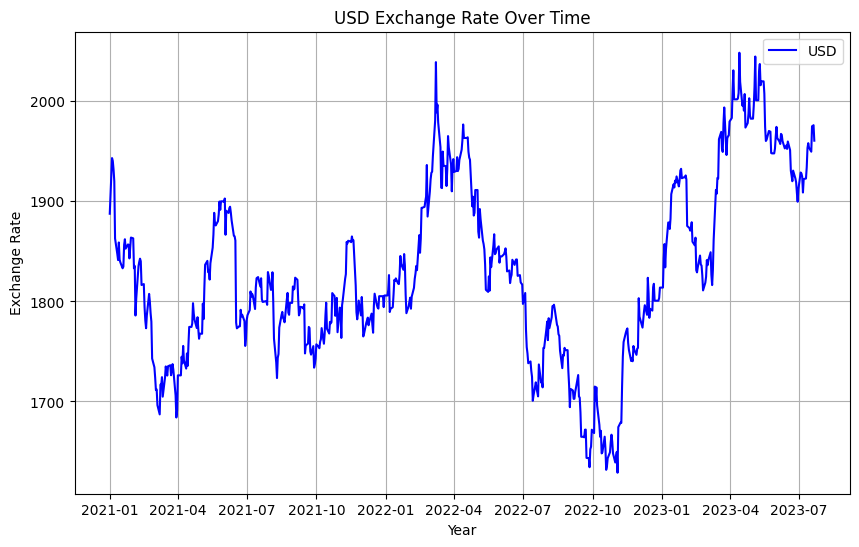

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(df_gold['Date'], df_gold['USD'], label='USD', color='blue') # Changed df to df_gold
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.title('USD Exchange Rate Over Time')
plt.legend()
plt.grid()
plt.show()

In [77]:
# Volatility Analysis
df_gold['USD_Return'] = df_gold['USD'].pct_change() * 100
df_gold['USD_Volatility'] = df_gold['USD_Return'].rolling(window=30).std()

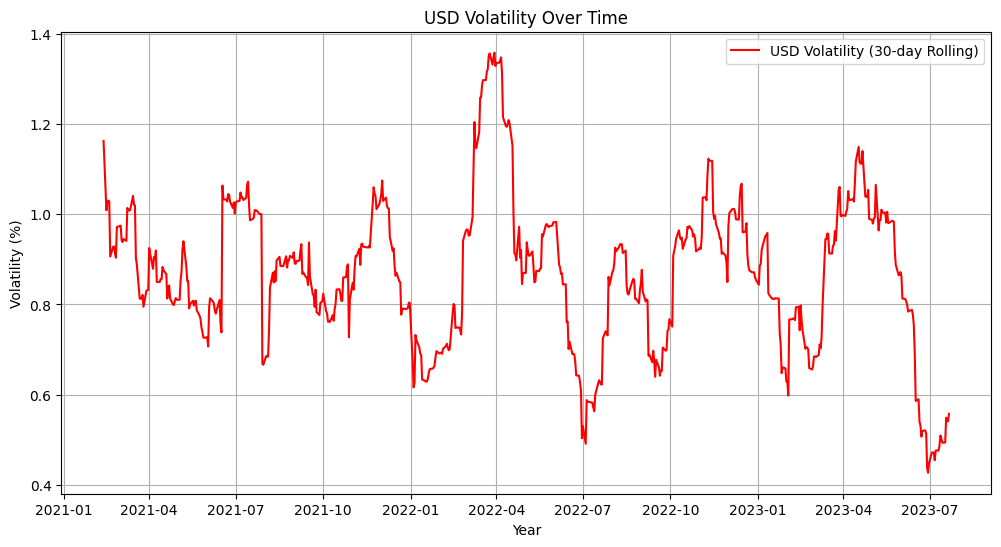

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(df_gold['Date'], df_gold['USD_Volatility'], label='USD Volatility (30-day Rolling)', color='red')
plt.xlabel('Year')
plt.ylabel('Volatility (%)')
plt.title('USD Volatility Over Time')
plt.legend()
plt.grid()
plt.show()

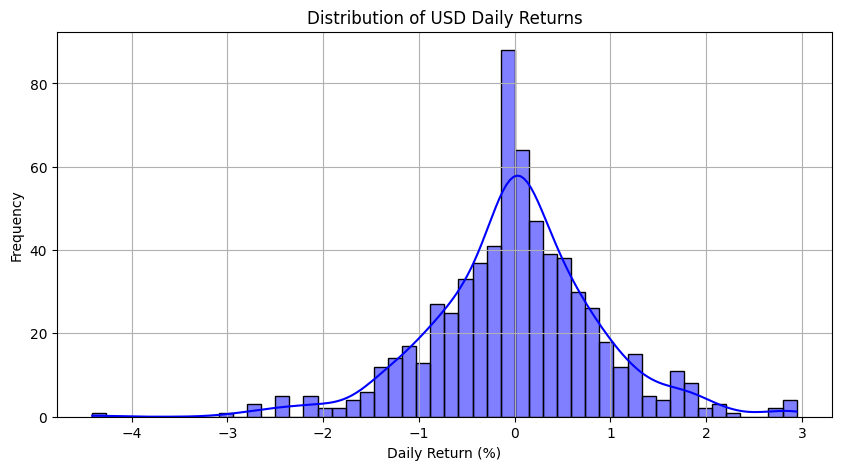

In [79]:
#2. Distribusi Return Harian Mata Uang
plt.figure(figsize=(10, 5))
sns.histplot(df_gold['USD_Return'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of USD Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

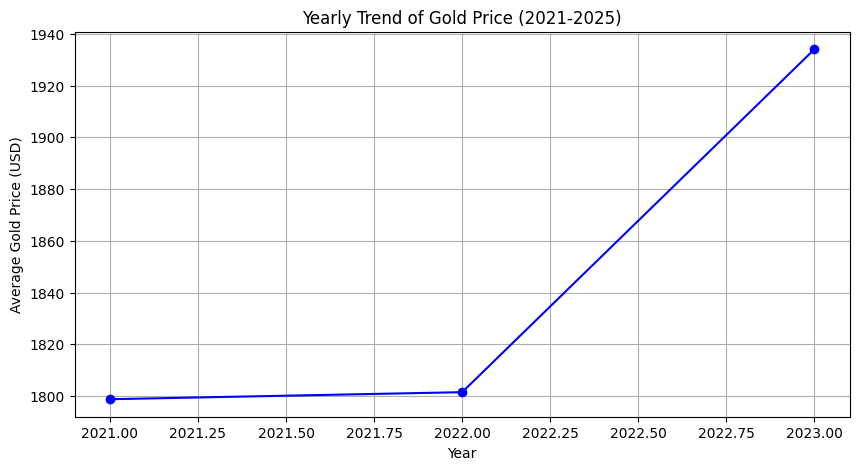

In [80]:
# Yearly Average Gold Price (USD)
# Extract the year from the 'Date' column and create a new 'Year' column
df_gold['Year'] = df_gold['Date'].dt.year

yearly_avg = df_gold.groupby('Year')['USD'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Average Gold Price (USD)')
plt.title('Yearly Trend of Gold Price (2021-2025)')
plt.grid()
plt.show()

<ipython-input-81-4514c1e5c92b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_gold['Year'], y=df_gold['USD'], palette='pink')


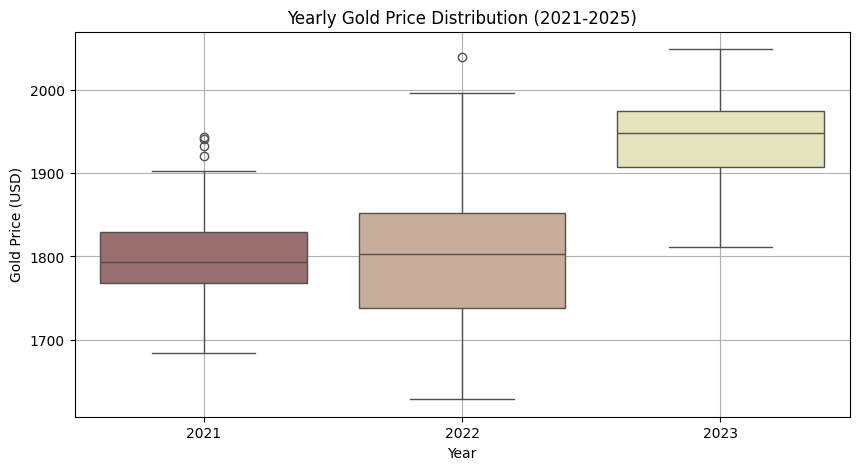

In [81]:
# Boxplot for Yearly Gold Price Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_gold['Year'], y=df_gold['USD'], palette='pink')
plt.xlabel('Year')
plt.ylabel('Gold Price (USD)')
plt.title('Yearly Gold Price Distribution (2021-2025)')
plt.grid()
plt.show()